# AST326: Lab 1 

In [48]:
import numpy as np
import astropy
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn

large = np.loadtxt('Charoonruk-charoonr-Large.txt', unpack = True)
small = np.loadtxt('Charoonruk-charoonr-Small.txt', unpack = True)

# Question 1
Reproduce Figure 3 using your own Python program. Your plot doesn’t have to be exactly the same as Figure 3 in every details but  must provide a histogram compared with an expected Poisson distribution.

In [49]:
arr = np.array([13, 17, 18, 14, 11, 8, 21, 18, 9, 12, 9, 17, 14, 6, 10, 16, 16, 11, 10, 12, 8, 20, 14, 10, 14, 17, 13, 16, 12, 10])
print(arr)
len(arr)

[13 17 18 14 11  8 21 18  9 12  9 17 14  6 10 16 16 11 10 12  8 20 14 10
 14 17 13 16 12 10]


30

12
13.960000000000003


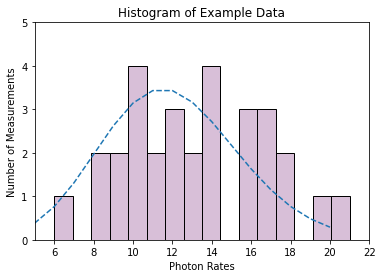

In [50]:
# Mean and Variance of Distribution
mean_mu = 12
var_sig = np.var(arr)

print(mean_mu)
print(var_sig)

# Sample distribution
nsample = len(arr) # length of data = number of samples = 30

#Histogram
num_bins = 16
bins = num_bins
plt.hist(arr, bins=num_bins, density = False, color = 'thistle', edgecolor='black')
plt.axis([5, 22, 0, 5])

#Distribution

from scipy.stats import poisson

x = np.arange(poisson.ppf(0.01, mean_mu), poisson.ppf(0.99, mean_mu))
plt.plot(x, (poisson.pmf(x, mean_mu))*(nsample), ms=8, label='poisson pmf', linestyle='dashed')

plt.xlabel('Photon Rates')
plt.ylabel('Number of Measurements')
plt.title('Histogram of Example Data')

plt.savefig('Question1.png')

# Question 2
[10 pts] Read the two files in your Python programs and calculate the mean and standard deviation of the measurements recorded in each file (so you will have the parameters for “Small” and “Large” files respectively). Are they consistent with what you expect from a Poisson distribution?

In [51]:
large = np.loadtxt('Charoonruk-charoonr-Large.txt', unpack = True)
small = np.loadtxt('Charoonruk-charoonr-Small.txt', unpack = True)

# Large File
large_steps = large
l_mean = np.mean(large)
l_std = np.std(large)
print('The mean from the Large sample is', l_mean)
print('The standard deviation of the large sample is', l_std)

# Small File
small_steps = small
s_mean = np.mean(small)
s_std = np.std(small)
print('The mean from the Small sample is', s_mean)
print('The standard deviation of the Small sample is', s_std)

The mean from the Large sample is 1025.871
The standard deviation of the large sample is 31.546701238005856
The mean from the Small sample is 3.196
The standard deviation of the Small sample is 1.7679321253939588


# Question 3
[15pts] Plot the measurements to examine their distributions. First, you can simply plot the measurements in sequence and then a histogram (like Figure 1 above). These analyses and plots need to be done separately for “Small” and “Large” measurements. By glancing the plots, can you roughly estimate the mean and standard deviation of the two measurements? Compare the histogram that you created for the “Small” data with what is expected from a Poisson distribution as is done in Figure 3 above.

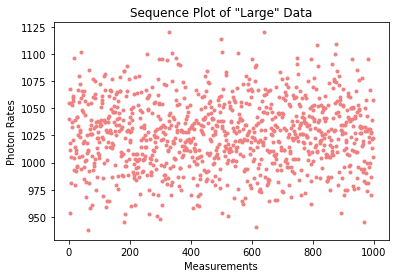

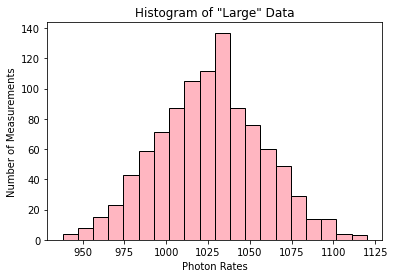

<Figure size 432x288 with 0 Axes>

In [52]:
large_steps = large

x = np.arange(0, len(large))
plt.plot(x, large, '.', color = 'lightcoral')
plt.xlabel('Measurements')
plt.ylabel('Photon Rates')
plt.title('Sequence Plot of "Large" Data')
plt.figure()
plt.savefig('Question3a.png')

plt.hist(large_steps, bins=20, density = False, color = 'lightpink', edgecolor='black')
plt.xlabel('Photon Rates')
plt.ylabel('Number of Measurements')
plt.title('Histogram of "Large" Data')
plt.figure()

plt.savefig('Question3b.png')

<Figure size 432x288 with 0 Axes>

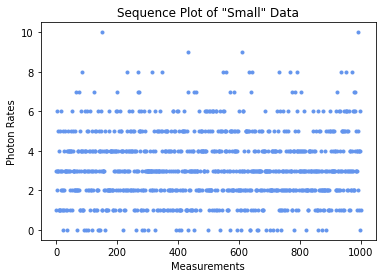

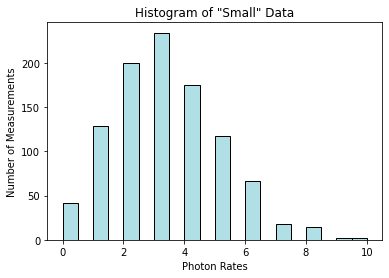

<Figure size 432x288 with 0 Axes>

In [53]:
small_steps = small

b = np.arange(0, len(small))
plt.plot(b, small, '.', color = 'cornflowerblue')
plt.xlabel('Measurements')
plt.ylabel('Photon Rates')
plt.title('Sequence Plot of "Small" Data')
plt.figure()

plt.hist(small_steps, bins=20, density = False, color = 'powderblue', edgecolor='black')
plt.xlabel('Photon Rates')
plt.ylabel('Number of Measurements')
plt.title('Histogram of "Small" Data')
plt.figure()

# Question 4
[15 pts] We learn in the class that when the expected average is large, a Poisson distribution becomes very similar to a Gaussian distribution. Let’s confirm this. First, between the histograms that you created for the “Small” and “Large” measurements, do you think the “Large” measurement looks like a Gaussian distribution more than the “Small” measurement (or vice versa)? Next, let’s overplot the Gaussian distribution expected from the mean and standard deviation that you calculated in Step 2 on the histograms that you created in Step 3. Does the Gaussian distribution for the “Large” measurements look more similar to the data than the “Small” measurements?

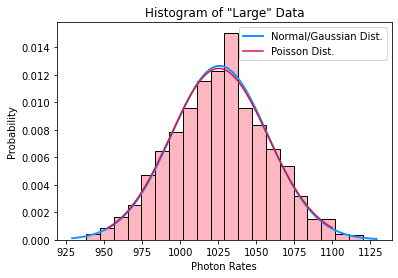

<Figure size 432x288 with 0 Axes>

In [54]:
## Large Data:

# Histogram
from scipy.stats import norm
plt.hist(large_steps, bins=20, density = True, color = 'lightpink', edgecolor='black')

l_mean = np.mean(large)
l_std = np.std(large)

# Normal/Gaussian Distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, l_mean, l_std)
 
plt.plot(x, p, linewidth=2, label = 'Normal/Gaussian Dist.', color = 'dodgerblue')

# Poisson Distribution
from scipy.stats import poisson

a = np.arange(poisson.ppf(0.01, l_mean), poisson.ppf(0.99, l_mean))
plt.plot(a, (poisson.pmf(a, l_mean)), ms=8, label='Poisson Dist.', color = 'crimson')

plt.xlabel('Photon Rates')
plt.ylabel('Probability')
plt.title('Histogram of "Large" Data')

plt.legend()
plt.show()

plt.savefig('Question4a.png')

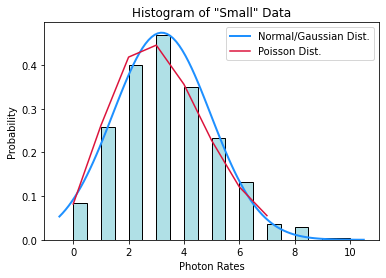

<Figure size 432x288 with 0 Axes>

In [55]:
# Small Data:

plt.hist(small_steps, bins=20, density = True, color = 'powderblue', edgecolor='black')

s_mean = np.mean(small)
s_std = np.std(small)

# Normal/Gaussian Distribution
xmin, xmax = plt.xlim()
z = np.linspace(xmin, xmax, 100)
p = norm.pdf(z, s_mean, s_std)
 
plt.plot(z, p*2.1, linewidth=2, label = 'Normal/Gaussian Dist.', color = 'dodgerblue')

# Poisson Distribution
from scipy.stats import poisson

b = np.arange(poisson.ppf(0.01, s_mean), poisson.ppf(0.99, s_mean))
plt.plot(b, (poisson.pmf(b, s_mean))*2, ms=8, label='Poisson Dist.', color = 'crimson')

plt.xlabel('Photon Rates')
plt.ylabel('Probability')
plt.title('Histogram of "Small" Data')

plt.legend()
plt.show()

plt.savefig('Question4b.png')